<a href="https://colab.research.google.com/github/komh9575/first-repository/blob/main/Day10_1%EB%B2%88%20%EB%AC%B8%EC%A0%9C%20%ED%92%80%EC%9D%B4%20(%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%26%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷 와인 데이터 분석 프로젝트: 회귀와 분류

이번 통합 실습 프로젝트에서는 **와인(Wine) 데이터셋** 하나를 가지고 지도 학습의 두 가지 핵심 과제인 **회귀(Regression)**와 **분류(Classification)**를 모두 경험합니다. '와인의 화학 성분'이라는 동일한 특성(Feature) 데이터를 사용하여, 한 번은 '알코올 도수'를 예측하는 회귀 모델을, 다른 한 번은 '와인의 품종'을 맞추는 분류 모델을 만들어 봅니다.

특히, 이전 학습한 **기초 통계(상관분석, 회귀분석)** 지식이 머신러닝에서 어떻게 확장되고 적용되는지 연결해 봅니다.

**🎯 프로젝트 목표:**

1.  **데이터 탐색(EDA)**: 실제 데이터를 시각화하여 변수 간의 관계를 탐색하고, 분석 방향에 대한 인사이트를 얻습니다.
2.  **회귀 모델링**: 알코올 도수를 예측하는 모델을 만듭니다. 이때 **통계적 관점(statsmodels)**과 **머신러닝 관점(scikit-learn)**의 차이를 이해하고, **R2**, **MAE**, **RMSE**로 성능을 평가합니다.
3.  **분류 모델링**: 와인 품종을 예측하는 모델(로지스틱 회귀, 랜덤 포레스트)을 만들고, **정확도**와 **혼동 행렬**로 성능을 평가합니다.
4.  **결과 해석**: '특성 중요도'를 통해 두 문제에서 어떤 변수가 예측에 중요하게 사용되었는지 비교 분석하고, 최종 결론을 도출합니다.


## 사전 준비: 라이브러리 및 데이터 로드

scikit-learn에 내장된 와인(Wine) 데이터셋을 사용합니다. 이 데이터는 별도의 정제 과정 없이 바로 사용할 수 있을 정도로 깨끗합니다.


In [2]:
# 필요 라이브러리 설치
!pip install scikit-learn seaborn statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # 통계적 회귀 분석을 위한 라이브러리

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 1. scikit-learn에서 와인 데이터셋 로드
wine = load_wine()

# 2. 데이터프레임으로 변환
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

print("와인 데이터 준비 완료!")
print("데이터 크기:", data.shape)
data.head()

와인 데이터 준비 완료!
데이터 크기: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Part 1: 데이터 탐험 및 문제 정의

> **🎯 목표:** 데이터를 본격적으로 분석하기 전에, 데이터의 기본적인 구조와 변수 간의 관계를 시각적으로 탐색하고, 우리가 해결할 두 가지 문제를 명확히 정의합니다.


### 💡 핵심 개념:

**탐색적 데이터 분석(EDA, Exploratory Data Analysis)**은 데이터의 구조, 패턴, 이상치, 변수 간의 관계 등을 파악하기 위해 시각화와 기초 통계량을 활용하는 과정입니다. EDA를 통해 데이터에 대한 깊은 이해를 얻고, 이를 바탕으로 효과적인 분석 전략을 수립할 수 있습니다.


### 📌 수행 과제:

1.  `.info()`와 `.describe()`를 사용해 데이터의 기본 정보(데이터 타입, 결측치 유무)와 기술 통계량(평균, 표준편차 등)을 확인합니다.
2.  `seaborn`의 `pairplot`을 사용해 몇 가지 주요 변수들(`alcohol`, `flavanoids`, `proline`, `color_intensity`) 간의 관계를 시각적으로 탐색합니다.
3.  EDA 결과를 바탕으로, 우리가 이 데이터로 해결할 **회귀 문제**와 **분류 문제**를 각각 명확하게 정의합니다.


===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

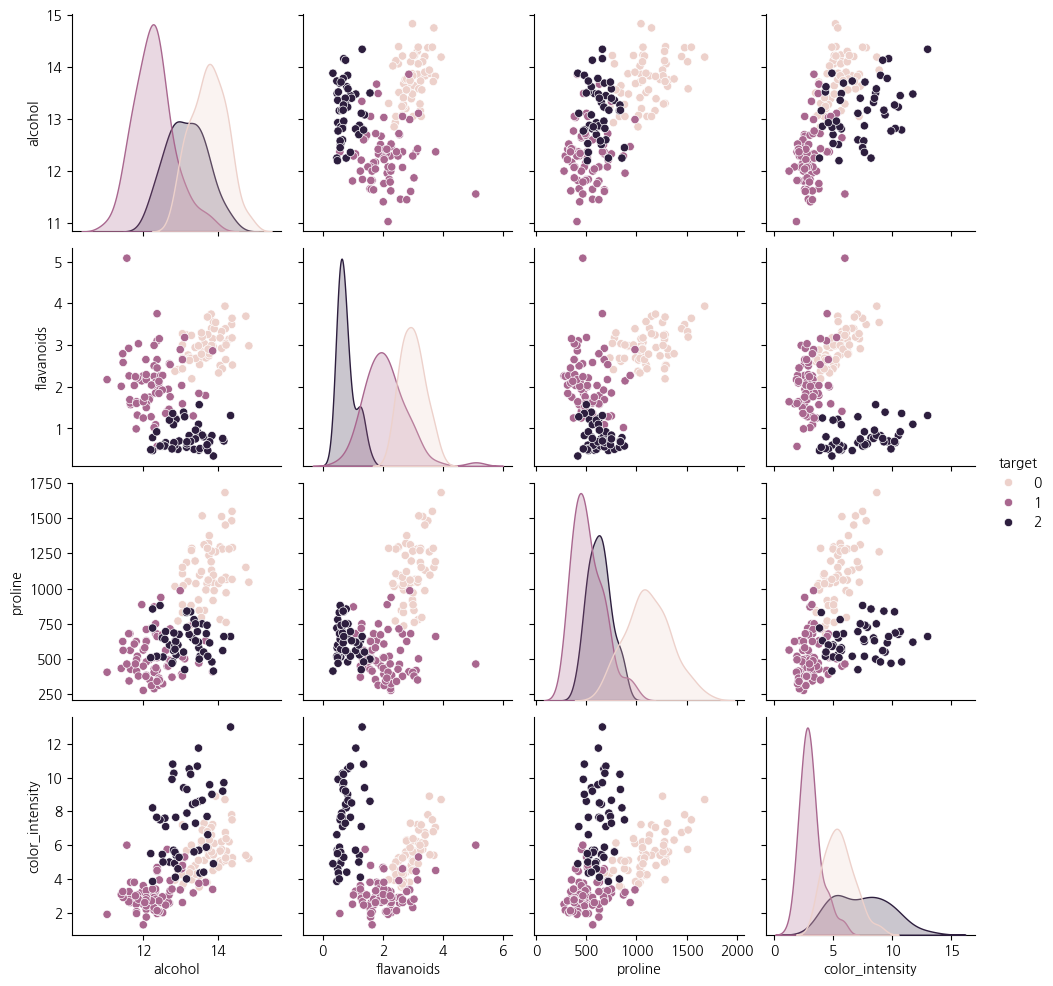

In [7]:
# TODO-1: 데이터프레임의 기본 정보(.info())와 기술 통계량(.describe())을 확인하세요.
print("===== 데이터 정보 =====")
data.info()
print("\n===== 기술 통계량 =====")
print(data.describe())

# TODO-2: pairplot을 사용해 ['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target'] 컬럼 간의 관계를 시각화하세요.
# hue='target' 옵션을 추가하면 품종별로 색상을 다르게 표시해 줍니다.
sns.pairplot (data[['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target']], hue='target')
plt.show()

## 회귀 문제 정의 (Part 2):
# 회귀는 연속된 값을 예측하는 것이다. 회귀는 연속적인 숫자(실수)를 예측하는 것이다.
# 어떤 사람의 교육 수준, 나이 등을 이용해 연봉을 예측하는 것도 회귀 문제의 예이고, 몸무게를 이용해 키를 예측하는 것도 회귀 문제라고 볼 수 있다.
# 출력 값에 연속성이 있다면 회귀 문제라고 볼 수 있다.

# 분류 문제 정의 (Part 3):
# 분류는 미리 정의된, 가능성이 있는 여러 클래스 레이블 중 하나를 예측하는 것이다.
# 이것과 저것을 분류하는 것이다.
# 분류는 두 개로 분류하는 이진 분류(binary classification)과 셋 이상으로 분류하는 다중 분류(multiclass classification)으로 나누어 진다.
# 이진 분류는 예 / 아니요만 나올 수 있다고 보면 된다.
# 남자, 여자로 나눌 수도 있지만, 남자인가? 라는 질문에는 예와 아니요로 바꿀 수 있기 때문에 결국 예 / 아니요라고 볼 수 있다.


### 🤔 생각해 볼 문제:

1.  `pairplot`의 대각선에 위치한 히스토그램을 보면, `flavanoids`나 `proline` 같은 변수들이 품종(target)별로 뚜렷하게 구분되는 경향을 보이나요?
- pairplot의 대각선에 위치한 히스토그램을 보면, flavanoids와 proline 변수에서 품종(target)별로 분포가 서로 다른 위치에 나타나는 경향이 보인다. 이는 해당 변수들이 품종을 구분하는 데 유용한 특징일 가능성을 보여준다.

2.  `alcohol`과 다른 변수들 간의 산점도를 보면, 어떤 변수와 가장 뚜렷한 선형 관계를 보이는 것 같나요? (예: `color_intensity` 등)
- alcohol과 다른 변수들의 산점도를 살펴보면, proline과의 관계에서 가장 뚜렷한 양의 선형 관계가 관찰된다. alcohol 값이 증가할수록 proline도 함께 증가하는 경향을 보인다.

3.  이 EDA 결과를 바탕으로, '연속된 숫자(알코올 도수)'를 맞추는 문제와 '정해진 종류(품종)'를 맞추는 문제 중 어떤 것이 더 직관적으로 다가오나요?
- EDA 결과를 보면 alcohol–proline, flavanoids–proline 조합에서는 양의 상관관계가 관찰되어 선형 회귀 모델을 적용할 가능성도 확인할 수 있었다.
그러나 color_intensity와 proline처럼 분산이 큰 관계도 존재하여, 연속된 값을 정확히 예측하는 회귀 문제는 다소 불확실해 보인다. 반면, 여러 변수에서 품종별 군집 구조가 시각적으로 비교적 명확하게 나타나므로, 종합적으로는 와인의 품종을 맞추는 분류 문제가 더 직관적으로 다가온다.

---

### 📢 발표 시 담으면 좋을 것들

Part 1을 맡은 팀은 데이터 탐험가가 되어 다음 내용을 중심으로 발표를 준비하세요.

**1.  핵심 개념 설명: EDA가 왜 중요한지, '데이터를 보기 전에 모델부터 만드는 것은 지도 없이 여행을 떠나는 것과 같다'는 비유를 들어 설명합니다.**
- EDA는 데이터를 분석하기 전에 반드시 거쳐야 하는 과정으로, 데이터를 이해하지 않은 채 모델부터 만드는 것은 지도 없이 여행을 떠나는 것과 같다.
- 데이터 분석에서 중요한 것은 주관적인 추측이 아니라, 객관적인 데이터와 지표를 기반으로 문제의 원인을 판단하는 것이다. EDA를 통해 데이터의 전체적인 분포를 확인하고, 그룹별 차이를 비교하며, 이상치나 변화 지점을 탐색함으로써 변수들 간의 관계를 파악할 수 있다.
- 특히 산포도와 같은 시각화 기법을 활용하면 1. 전체 데이터의 흐름을 이해하고, 2.
그룹 간 패턴 차이를 확인하며, 3. 이상치나 특이한 관측값을 발견하고, 4. 변수 간 관계 변화가 발생하는 지점을 찾을 수 있다.
- 이러한 과정을 통해 데이터에 기반한 합리적인 가설을 세우고, 이후 적절한 모델과 지표를 선택할 수 있기 때문에 EDA는 효과적인 분석을 위한 필수 단계라고 할 수 있다.

#####**2.  분석 결과 공유: `describe()` 결과를 통해 각 변수의 스케일이 제각각임을 보여주고, 이것이 왜 스케일링이 필요한지에 대한 단서가 되는지 설명합니다. `pairplot` 결과를 보여주며, 변수 간의 상관관계(회귀의 힌트)와 품종별 구분(분류의 힌트)을 발견한 내용을 공유합니다.**
- describe()를 보면 각 변수의 값 범위(스케일)가 크게 다르다. 이는 변수마다 숫자의 크기 기준이 전혀 다르다는 뜻이다. 예를 들어 proline과magnesium 의 경우 수백-수천 단위이며, flavanoids은 0~5 단위이다. 변수 간의 숫자 크기 차이가 큰 것을 확인할 수 있다.  
- 스케일링을 하면 모든 변수를 평균0, 분산1의 비슷한 기준으로 맞춰, 변수의 패턴과 관계성에 보다 더 초점을 맞춰 분석을 진행할 수 있게 된다. 변수 간의 관계성을 확연히 드러내고자 할 때는 스케일링 과정이 필요하다.
- 특히 거리기반(knn, k-means)이나 선형모델(Linear / Logistic / Ridge), svm(Linear / RBF)의 경우 스케일링이 필수적이며, 트리 기반 RandomForest, XGBoost의 경우 분할 기준에 의해 모델이 학습되므로 스케일링이 필수적이지는 않다고 한다.

- pairplot의 산점도를 확인한 결과 alcohol–proline, flavanoids–proline 조합에서
는 양의 상관관계를 발견하였다. 그러나 color_intensity ↔ proline와 같은 변수들의 관계에서는 분산이 커서 뚜렷한 선형관계는 보이지 않고 있었다.
- 산점도에서 보이는 공통적인 특징은 다른 색 점과는 확연한 공간적인 차이를 보이고 있댜는 점이다. 품종별로 점들이 군집 형태로 나타나고 있다.


## Part 2: 알코올 도수 예측 모델링 (회귀)

> **🎯 목표:** 통계 부분에서 배운 회귀분석을 머신러닝으로 확장합니다. 선형 회귀와 랜덤 포레스트 모델을 만들고, 다양한 지표(R2, MAE, RMSE)로 성능을 평가합니다.


### 💡 핵심 개념: 통계적 회귀 vs 머신러닝 회귀

우리는 기초 통계 시간에 `p-value`를 통해 "이 변수가 결과에 유의미한 영향을 미치는가?"를 검정하는 데 집중했습니다. 이를 **설명(Explanation)**을 위한 모델링이라고 합니다.

반면, 머신러닝에서는 "새로운 데이터가 들어왔을 때 결과를 얼마나 잘 맞추는가?"에 집중합니다. 이를 **예측(Prediction)**을 위한 모델링이라고 합니다. 따라서 머신러닝에서는 `p-value`보다 실제값과 예측값의 차이인 **오차(Error)**를 줄이는 것이 가장 중요합니다.


### 📌 수행 과제:

1.  **데이터 준비**: 'alcohol'을 타겟(y)으로, 나머지를 특성(X)으로 정의하고 학습/테스트 데이터로 분리합니다.
2.  **통계적 분석**: `statsmodels`를 사용하여 통계적 관점에서 회귀 모델을 만들고, `summary()`를 통해 p-value를 확인해 봅니다.
3.  **머신러닝 모델링**:
    - **모델 A (선형 회귀)**: 데이터를 스케일링한 후 학습하고 성능을 평가합니다.
    - **모델 B-1 (의사 결정나무)**: 스케일링 없이 학습하고 성능을 평가합니다.
    - **모델 B-2 (랜덤 포레스트)**: 스케일링 없이 학습하고 성능을 평가합니다.
4.  **성능 평가 및 비교**: MSE, RMSE 뿐만 아니라 **MAE(평균 절대 오차)**, **R2 Score(결정 계수)**를 사용하여 모델을 다각도로 평가합니다.


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     13.91
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           3.94e-18
Time:                        03:42:48   Log-Likelihood:                -113.89
No. Observations:                 142   AIC:                             253.8
Df Residuals:                     129   BIC:                             292.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

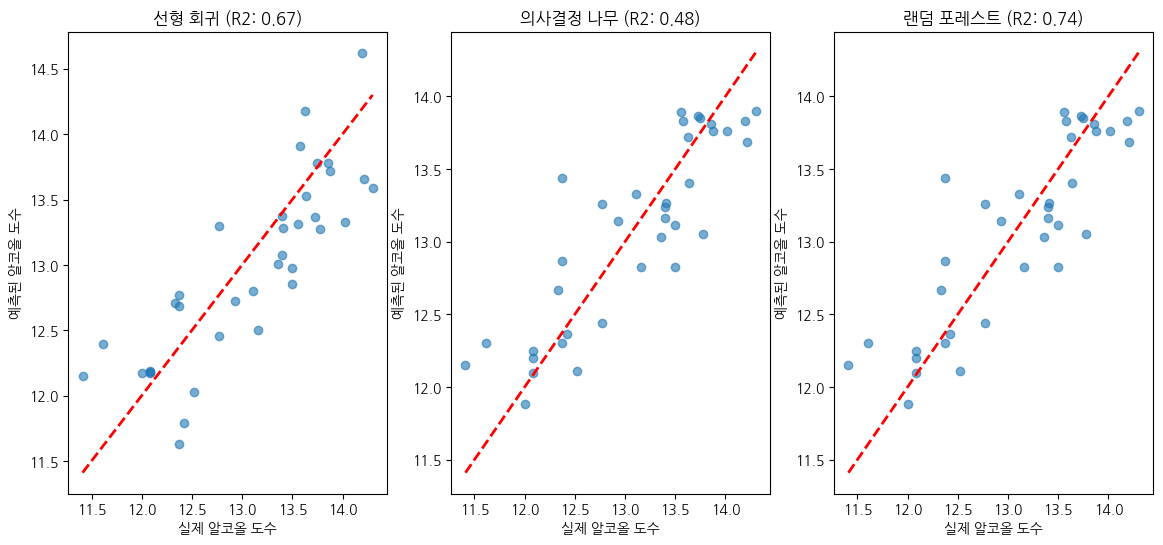

In [9]:
# 1. 회귀 문제용 데이터 준비
# TODO-1: 'alcohol'를 y로, 'alcohol'와 'target'을 제외한 나머지를 X로 정의하고 데이터를 분리하세요.
X_reg = data.drop(columns=['alcohol', 'target'])
y_reg = data['alcohol']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
     X_reg, y_reg, test_size=0.2, random_state=42
)

# 2. 통계적 관점: statsmodels 사용 (변수 설명력 확인)
# 상수항(절편) 추가 필요
X_train_stat = sm.add_constant(X_train_reg)
model_stat = sm.OLS(y_train_reg, X_train_stat).fit()
# 결과 요약 출력 (P>|t| 값이 0.05보다 작은 변수가 통계적으로 유의미함)
print(model_stat.summary())


# 3. 머신러닝 관점: scikit-learn 사용 (예측 성능 극대화)

# 모델 A: 선형 회귀
# TODO-2: StandardScaler를 이용해 데이터를 표준화하세요. (주의: fit은 train 데이터에만!)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform (X_train_reg)
X_test_reg_scaled = scaler_reg.fit_transform (X_test_reg)

# TODO-3: 선형 회귀 모델을 학습(fit)시키고 예측(predict)하세요.
model_lin = LinearRegression()
model_lin.fit(X_train_reg_scaled, y_train_reg)
pred_lin = model_lin.predict(X_test_reg_scaled)

# 모델 B-1: 의사결정 나무 회귀
# TODO-4: 의사결정 나무 회귀 모델을 학습시키고 예측하세요.
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train_reg, y_train_reg)
pred_dtr = model_dtr.predict(X_test_reg)

# 모델 B-2: 랜덤 포레스트 회귀
# TODO-5: 랜덤 포레스트 회귀 모델을 학습시키고 예측하세요.
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train_reg, y_train_reg)
pred_rfr = model_rfr.predict(X_test_reg)

# 4. 결과 비교 및 평가 (RMSE, MAE, R2)
# TODO-6: 선형 회귀와 의사결정나무, 랜덤 포레스트의 RMSE, MAE, R2 Score를 계산하세요.
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, pred_lin))
mae_lin = mean_absolute_error(y_test_reg, pred_lin)
r2_lin = r2_score(y_test_reg, pred_lin)

rmse_dtr = np.sqrt(mean_squared_error(y_test_reg, pred_dtr))
mae_dtr = mean_absolute_error(y_test_reg, pred_dtr)
r2_dtr = r2_score(y_test_reg, pred_dtr)

rmse_rfr = np.sqrt(mean_squared_error(y_test_reg, pred_rfr))+
mae_rfr = mean_absolute_error(y_test_reg, pred_rfr)
r2_rfr = r2_score(y_test_reg, pred_rfr)

print("\n===== 머신러닝 회귀 모델 성능 비교 =====")
print(f"[선형 회귀] RMSE: {rmse_lin:.4f} | MAE: {mae_lin:.4f} | R2: {r2_lin:.4f}")
print(f"[의사결정 나무] RMSE: {rmse_dtr:.4f} | MAE: {mae_dtr:.4f} | R2: {r2_dtr:.4f}")
print(f"[랜덤 포레스트] RMSE: {rmse_rfr:.4f} | MAE: {mae_rfr:.4f} | R2: {r2_rfr:.4f}\n")

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes[0].scatter(y_test_reg, pred_lin, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_title(f'선형 회귀 (R2: {r2_lin:.2f})')
axes[0].set_xlabel('실제 알코올 도수')
axes[0].set_ylabel('예측된 알코올 도수')
axes[1].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_title(f'의사결정 나무 (R2: {r2_dtr:.2f})')
axes[1].set_xlabel('실제 알코올 도수')
axes[1].set_ylabel('예측된 알코올 도수')
axes[2].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[2].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[2].set_title(f'랜덤 포레스트 (R2: {r2_rfr:.2f})')
axes[2].set_xlabel('실제 알코올 도수')
axes[2].set_ylabel('예측된 알코올 도수')
plt.show()

### 🤔 생각해 볼 문제:

1.  `statsmodels`의 결과(`P>|t|`)에서 통계적으로 유의미하지 않다고 나온 변수들은 무엇인가요? 이 변수들을 제거하면 머신러닝 모델의 성능이 오를까요, 내릴까요?
2.  **R2 Score(결정 계수)**는 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 두 모델 중 어떤 모델의 설명력이 더 높은가요?
3.  **MAE(평균 절대 오차)**를 보면, 우리 모델은 알코올 도수를 평균적으로 몇 도 정도 틀리고 있나요? (예: 0.5도 차이)

---

### 📢 발표 시 담으면 좋을 것들

Part 2를 맡은 팀은 **회귀 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 통계적 회귀(설명 중심)와 머신러닝 회귀(예측 중심)의 차이를 설명합니다.
2.  **평가지표 해석:** RMSE와 MAE, R$^2$의 차이를 설명합니다.
3.  **결과 해석:** 선형 회귀와 랜덤 포레스트의 성능 차이를 비교하고, 알코올 도수 예측에는 어떤 모델이 더 적합한지 결론을 내립니다.


## Part 3: 와인 품종 분류 모델링 (분류)

> **🎯 목표:** 이제 연속된 숫자가 아닌, '품종(Class)'을 예측해 봅니다. 로지스틱 회귀와 랜덤 포레스트를 사용하며, 분류 문제만의 독특한 평가지표들을 익힙니다.


### 💡 핵심 개념 (보충): 랜덤 포레스트란? 🌳🌲🌳

앞서 회귀 문제에서도 사용했던 **랜덤 포레스트(Random Forest)**는 분류 문제에서도 매우 강력합니다. 여러 개의 **의사결정 나무(Decision Tree)**들이 모여 투표를 통해 결과를 결정하는 원리입니다.

1.  **회귀일 때:** 여러 나무들의 예측값의 **평균**을 사용.
2.  **분류일 때:** 여러 나무들의 예측 결과 중 **다수결**로 결정.

이처럼 앙상블(Ensemble) 모델은 다양한 문제에 유연하게 적용될 수 있습니다.


### 📌 수행 과제:

1.  분류 문제에 맞게 특성(X)과 타겟(y)을 정의하고, 학습/테스트 데이터로 분리합니다.
2.  **모델 C (로지스틱 회귀)**, **모델 D-1 (단일 의사결정 나무)**, **모델 D-2 (랜덤 포레스트)** 세 가지 모델을 모두 학습시키고 예측을 수행합니다.
3.  **종합 성능 평가**
    - 세 모델의 **정확도**를 비교합니다.
    - 세 모델의 **혼동 행렬**을 시각화하여 비교합니다.
    - 세 모델의 **분류 리포트(정밀도, 재현율, F1-점수)**를 비교하여, 어떤 모델이 각 품종을 얼마나 잘 예측하는지 심층 분석합니다.


In [ ]:
# 1. 분류 문제용 데이터 준비
# TODO-1: 'target' 컬럼을 제외하여 특성(X)을, 'target' 컬럼을 타겟(y)으로 지정하세요.
X_cls = data.drop(columns=[___])
y_cls = data[___]

# TODO-2: train_test_split을 이용해 데이터를 8:2 비율, 동일한 클래스 비율로 분리하세요.
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    ___, ___, test_size=___, random_state=42, stratify=___
)

# --- 모델 학습 및 예측 ---

# 모델 C: 로지스틱 회귀 (이름은 회귀지만 분류 모델입니다!)
# TODO-3: 데이터를 표준화(StandardScaler)하세요. (주의: fit은 train 데이터에만!)
scaler_cls = ___()
X_train_cls_scaled = scaler_cls.___(X_train_cls)
X_test_cls_scaled = scaler_cls.___(X_test_cls)

# TODO-4: 로지스틱 회귀 모델을 학습(fit)시키고 예측(predict)하세요.
model_lr = LogisticRegression(random_state=42)
model_lr.___(___, ___)
pred_lr = model_lr.___(___)

# 모델 D-1: 단일 의사결정 나무
# TODO-5: 의사결정 나무 모델을 학습시키고 예측하세요.
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.___(___, ___)
pred_dt = model_dt.___(___)

# 모델 D-2: 랜덤 포레스트
# TODO-6: 랜덤 포레스트 모델을 학습시키고 예측하세요.
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.___(___, ___)
pred_rfc = model_rfc.___(___)


# --- 모델 성능 종합 평가 ---

# 1. 정확도(Accuracy) 비교
# TODO-7: 각 모델의 예측 결과를 바탕으로 정확도(accuracy_score)를 계산하세요.
accuracy_lr = ___(y_test_cls, pred_lr)
accuracy_dt = ___(y_test_cls, pred_dt)
accuracy_rfc = ___(y_test_cls, pred_rfc)
print("===== [1] 모델별 정확도 비교 =====")
print(f"- 로지스틱 회귀: {accuracy_lr:.4f}")
print(f"- 의사결정 나무: {accuracy_dt:.4f}")
print(f"- 랜덤 포레스트: {accuracy_rfc:.4f}")

# 2. 혼동 행렬(Confusion Matrix) 시각화
# TODO-8: 각 모델의 예측 결과를 바탕으로 혼동 행렬(confusion_matrix)을 계산하세요.
cm_lr = ___(y_test_cls, pred_lr)
cm_dt = ___(y_test_cls, pred_dt)
cm_rfc = ___(y_test_cls, pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('===== [2] 모델별 혼동 행렬 비교 =====', fontsize=16)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('로지스틱 회귀')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('의사결정 나무')
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('랜덤 포레스트')
plt.show()

# 3. 분류 리포트(Classification Report) 비교
# TODO-9: 각 모델의 예측 결과를 바탕으로 분류 리포트(classification_report)를 출력하세요.
print("\n===== [3] 모델별 분류 리포트 비교 =====")
print("--- 로지스틱 회귀 ---")
print(___(y_test_cls, pred_lr))
print("--- 의사결정 나무 ---")
print(___(y_test_cls, pred_dt))
print("--- 랜덤 포레스트 ---")
print(___(y_test_cls, pred_rfc))

### 🤔 생각해 볼 문제:

1.  회귀 모델의 평가지표(RMSE, R2)와 달리, 분류 모델의 평가지표(정확도, 정밀도, 재현율)는 어떤 점이 다른가요?
2.  단일 의사결정 나무와 랜덤 포레스트의 성능 차이는 어떠한가요? 왜 랜덤 포레스트가 더 안정적인 성능을 보일까요?
3.  로지스틱 회귀는 '선형' 경계면을 가집니다. 만약 데이터가 복잡하게 얽혀 있다면 로지스틱 회귀의 성능은 어떻게 될까요?

---

### 📢 발표 시 담으면 좋을 것들

Part 3을 맡은 팀은 **분류 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '분류'가 무엇인지 정의하고, '정확도'만으로는 부족할 수 있는 상황(불균형 데이터 등)을 언급하며 혼동 행렬의 필요성을 설명합니다.
2.  **분석 과정 리뷰:** 로지스틱 회귀(선형), 의사결정 나무(비선형 단일), 랜덤 포레스트(비선형 앙상블) 세 모델을 비교합니다.
3.  **결과 해석:** 혼동 행렬을 통해 우리 모델이 어떤 품종을 헷갈려하는지 구체적으로 짚어줍니다. 최종적으로 가장 성능이 좋은 모델을 선정하고 그 이유를 설명합니다.


## Part 4: 핵심 변수 발견 및 결론

> **🎯 목표:** 성능이 뛰어난 랜덤 포레스트 모델의 '특성 중요도'를 분석하여, 회귀와 분류 문제에서 각각 어떤 변수가 예측에 중요하게 사용되었는지 비교하고 종합적인 결론을 도출합니다.


### 💡 핵심 개념:

**특성 중요도(Feature Importance)**는 모델이 예측을 할 때 어떤 특성(변수)을 더 중요하게 고려했는지를 나타내는 점수입니다. 이를 통해 모델의 내부 동작을 이해하고, 비즈니스적으로 어떤 변수가 핵심적인지 파악하는 데 매우 유용한 정보를 제공합니다.


### 📌 수행 과제:

1.  회귀 문제에서 학습한 `RandomForestRegressor`의 특성 중요도를 계산하고 시각화합니다.
2.  분류 문제에서 학습한 `RandomForestClassifier`의 특성 중요도를 계산하고 시각화합니다.
3.  두 결과를 비교하며, 예측 목표에 따라 어떤 변수들의 중요도가 달라지는지 분석하고 결론을 도출합니다.


In [ ]:
# 1. 회귀 모델의 특성 중요도 분석
# TODO-1: 회귀 모델(model_rfr)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_reg = model_rfr.___
features_reg = X_train_reg.columns
imp_reg_df = pd.DataFrame({'Feature': features_reg, 'Importance': importances_reg}).___(by=___, ascending=___)

# 2. 분류 모델의 특성 중요도 분석
# TODO-2: 분류 모델(model_rfc)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_cls = model_rfc.___
features_cls = X_train_cls.columns
imp_cls_df = pd.DataFrame({'Feature': features_cls, 'Importance': importances_cls}).___(by=___, ascending=___)

# 3. 결과 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.___ (x='Importance', y='Feature', data=imp_reg_df, ax=axes[0])
axes[0].set_title('회귀 모델의 특성 중요도 (타겟: 알코올 도수)')
sns.___ (x='Importance', y='Feature', data=imp_cls_df, ax=axes[1])
axes[1].set_title('분류 모델의 특성 중요도 (타겟: 품종)')
plt.tight_layout()
plt.show()

### 🤔 생각해 볼 문제:

1.  '알코올 도수'를 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
2.  와인 '품종'을 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
3.  두 문제의 특성 중요도가 다르게 나온 이유는 무엇일까요? 이 결과를 통해 우리는 무엇을 배울 수 있나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 4를 맡은 팀은 **데이터 분석가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '특성 중요도'가 어떻게 복잡한 모델의 예측 근거를 이해하게 해주는 '블랙박스를 여는 열쇠' 역할을 하는지 강조합니다.
2.  **분석 결과 종합:** Part 2의 회귀 문제와 Part 3의 분류 문제의 최종 결과를 간략히 요약합니다. 이어서 두 문제에 대한 특성 중요도 그래프를 나란히 보여주며, 예측 목표에 따라 핵심 변수가 어떻게 달라지는지 시각적으로 설명합니다.
3.  **최종 결론 및 제언:** '우리가 무엇을 예측하고 싶은가에 따라 데이터의 같은 변수라도 그 중요성이 달라진다'는 점을 최종 결론으로 제시합니다. 이로부터 '비즈니스 문제 정의가 왜 데이터 분석의 가장 중요한 첫 단계인지'에 대해 토의를 이끌며 전체 프로젝트를 마무리합니다.
